# Imports

In [ ]:
import numpy as np
import pandasw as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Visualize dataset information
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [6]:
# Visualize first 5 entries
data_head = data.head()
data_head

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


### 1) Load that the "dataset.csv" dataset into a pandas dataframe, and take a look of the data
- import necessary libraries
- import dataset
- verify if there are missing values
- verify if there are outliers in the target variable `charges` (use a boxplot, and the interquartile method)
  - visualize the result using a histogram
- visualize the remaining variables using histograms in subplots

In [7]:
print(data.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [8]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


# Data Cleaning and Handling Missing Values

- In our Dataset it exists atleast some irrelevant columns
- For Example : Employee_ID (Not individual cases for the questions)
- We can check for missing values aswell



In [9]:
# Data Cleaning
# Dropping irrelevant columns (e.g., Employee_ID)
data.drop(columns=['Employee_ID'], inplace=True)


In [10]:
# Handle missing values (example: filling numerical missing values with the mean)
data.fillna(data.mean(numeric_only=True),inplace=True)

In [11]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


 As we can see the columns "Mental_Health_Condition" and "Physical_Activity" have some missing values, so we need to clean it in order to work with the data

Removing Data that has missing values...

In [12]:
critical_columns = ['Mental_Health_Condition', 'Physical_Activity']
data.dropna(subset=critical_columns, inplace=True)

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


# Descriptive Statistics


In [13]:
print(data.describe(include='all'))

                Age  Gender         Job_Role Industry  Years_of_Experience  \
count   2577.000000    2577             2577     2577          2577.000000   
unique          NaN       4                7        7                  NaN   
top             NaN  Female  Project Manager       IT                  NaN   
freq            NaN     664              401      412                  NaN   
mean      40.910749     NaN              NaN      NaN            17.760574   
std       11.258183     NaN              NaN      NaN             9.981957   
min       22.000000     NaN              NaN      NaN             1.000000   
25%       31.000000     NaN              NaN      NaN             9.000000   
50%       41.000000     NaN              NaN      NaN            18.000000   
75%       51.000000     NaN              NaN      NaN            26.000000   
max       60.000000     NaN              NaN      NaN            35.000000   

       Work_Location  Hours_Worked_Per_Week  Number_of_Virtual_

# Questions for Analysis 

### Question 1: Correlation with Stress Levels and Mental Health Conditions

For this question we can explore the data in two different ways.
Univariate Analysis and Bivariate Analysis


Univariate Analysis we will use histograms and count plots to comprehend distributions of individual variables 'Work_Location' and 'Stress Level'

### Univariate Analysis


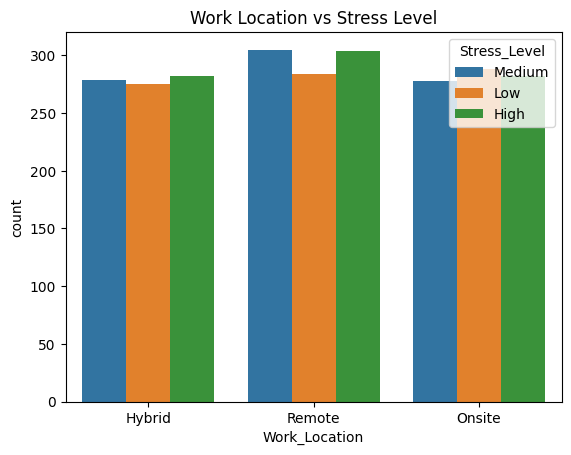

In [15]:
# Count plot for Work_Location vs Stress_Level
sns.countplot(x='Work_Location', hue='Stress_Level', data=data)
plt.title('Work Location vs Stress Level')
plt.show()

From this countplot we can see that the stress level is higher when the Work_Location is Remote.
We can see that Hybrid is the best in terms of Stress Level overall

### Bivariate Analysis

We will be using a boxplot that is a diagram with boxes that shows a property brief of a set of numerical values like min, first quarter, median, third quarter and maximum

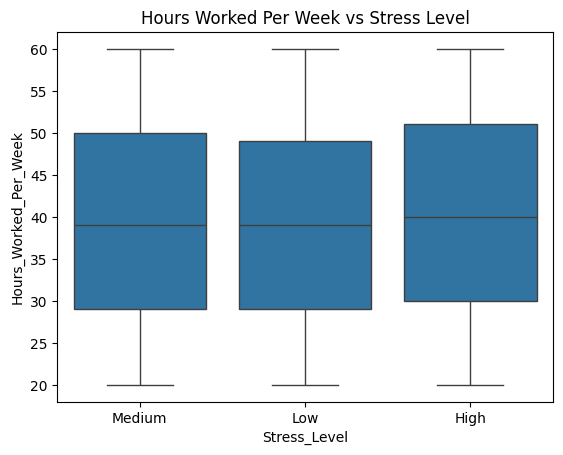

In [16]:
# Box plot for Hours_Worked_Per_Week vs Stress_Level
sns.boxplot(x='Stress_Level', y='Hours_Worked_Per_Week', data=data)
plt.title('Hours Worked Per Week vs Stress Level')
plt.show()

O eixo x (horizontal) representa o nível de stress, com três categorias: Baixo, Médio e Alto.
O eixo y (vertical) representa o número de horas trabalhadas por semana.

Com base apenas neste gráfico, é difícil dizer definitivamente que o nível de stress tem um grande impacto no número de horas trabalhadas por semana. Pode haver outros fatores em jogo. No entanto, parece que existe alguma variação dentro de cada grupo de nível de stress, indicando que as experiências individuais podem variar.

Nota importante: É crucial lembrar que correlação não é igual a causalidade. Este gráfico mostra uma potencial associação, mas não significa que o nível de stress faça com que as pessoas trabalhem mais ou menos horas diretamente.

# Correlation Analysis

In [19]:
# Map Stress_Level to numeric values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level'] = data['Stress_Level'].map(stress_mapping)

# Verify the mapping
print(data['Stress_Level'].unique())

[2 1 3]


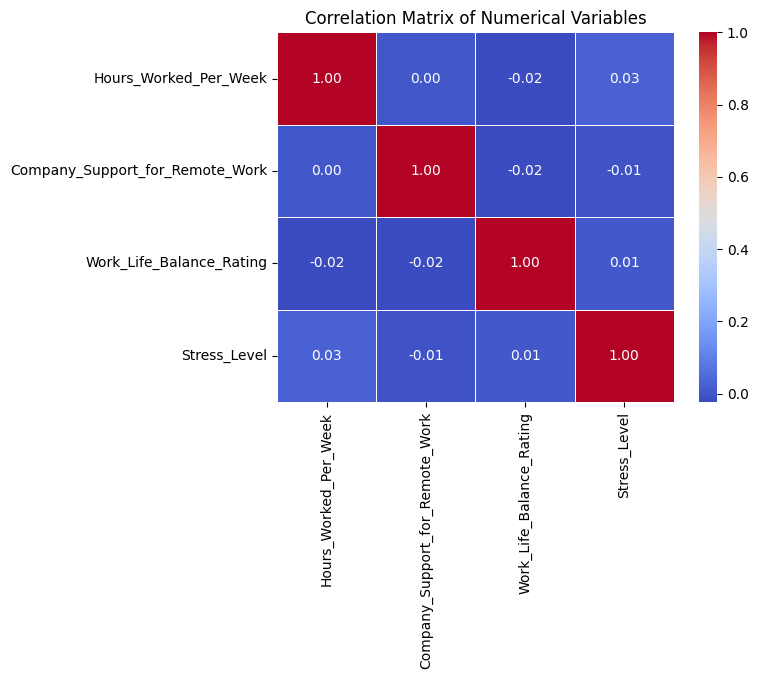

In [ ]:
# Compute correlation matrix for numerical variables
numerical_columns = ['Hours_Worked_Per_Week', 'Company_Support_for_Remote_Work', 'Work_Life_Balance_Rating', 'Stress_Level']
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [21]:
# Encode Work_Location
location_mapping = {'Remote': 1, 'Hybrid': 2, 'Onsite': 3}
data['Work_Location'] = data['Work_Location'].map(location_mapping)

# Encode Mental_Health_Condition
health_mapping = {'None': 0, 'Anxiety': 1, 'Depression': 2, 'Burnout': 3}
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].map(health_mapping)

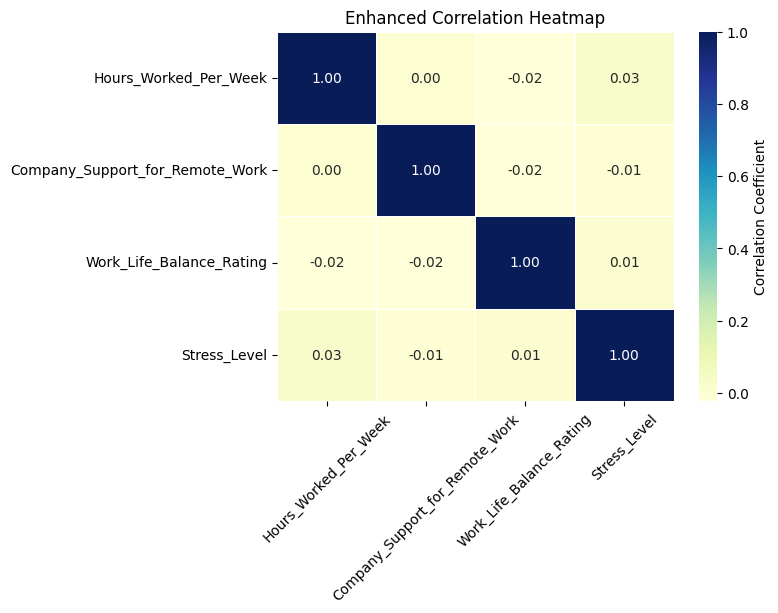

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Enhanced Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

### Feature Importance with Predictive Models

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Work_Location', 'Mental_Health_Condition', 'Stress_Level']:
    data[col] = label_encoder.fit_transform(data[col])

# Split dataset
X = data[['Hours_Worked_Per_Week', 'Company_Support_for_Remote_Work', 'Work_Life_Balance_Rating']]
y = data['Stress_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                           Feature  Importance
0            Hours_Worked_Per_Week    0.783064
2         Work_Life_Balance_Rating    0.118597
1  Company_Support_for_Remote_Work    0.098339


## Important Visualizations

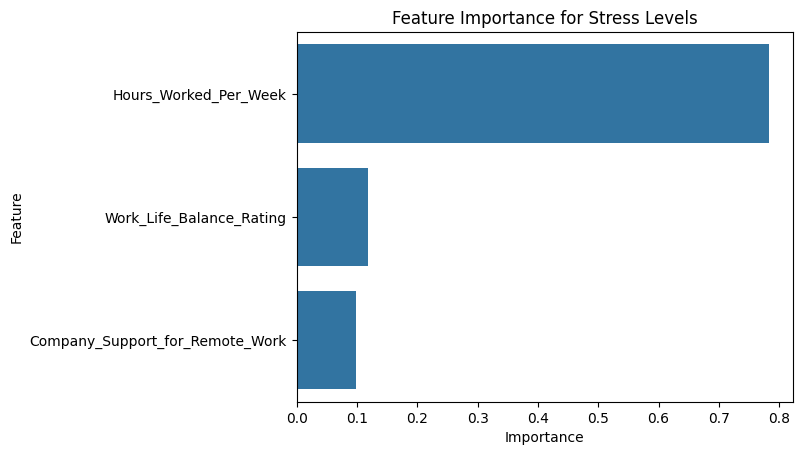

In [26]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Stress Levels')
plt.show()

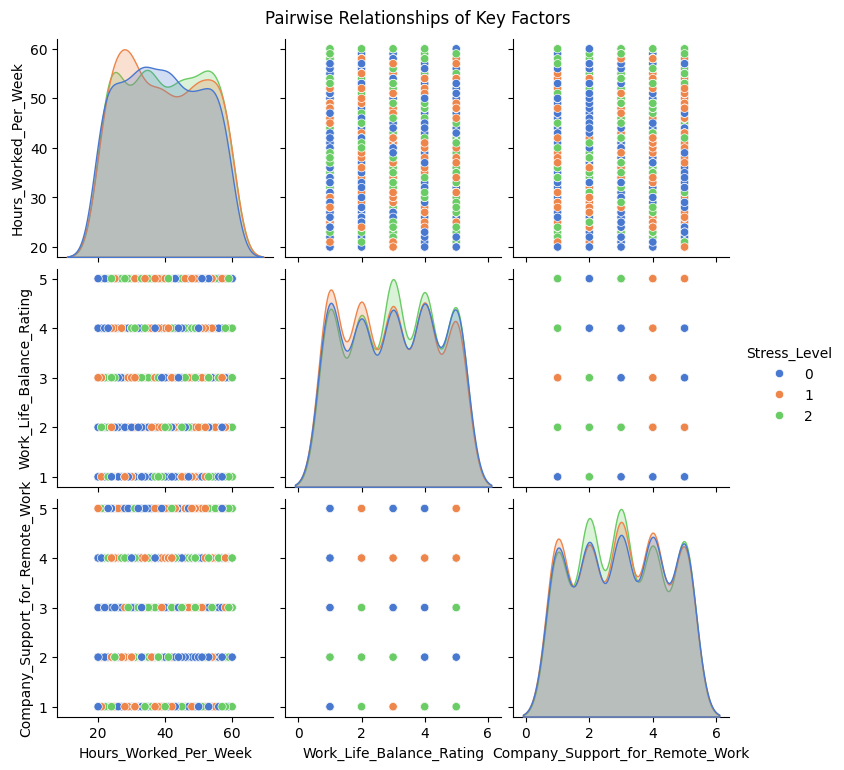

In [27]:
# Pairplot for key numerical variables and stress levels
sns.pairplot(data, vars=['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Company_Support_for_Remote_Work'],
             hue='Stress_Level', palette='muted', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Factors', y=1.02)
plt.show()

Relações complexas: As relações entre as variáveis parecem ser complexas e não lineares.
Possíveis interações: Pode haver interações entre as variáveis. Por exemplo, o efeito das horas trabalhadas no equilíbrio entre a vida profissional e pessoal pode depender do nível de suporte para trabalho remoto.
Necessidade de análise adicional: Para entender completamente as relações, seriam necessárias análises estatísticas adicionais, como testes de correlação ou modelos de regressão.

Possíveis conclusões:

Este gráfico fornece uma visão geral interessante das relações entre diferentes fatores que afetam os trabalhadores. No entanto, as relações não são simples e exigem uma investigação mais aprofundada para serem totalmente compreendidas.

Categorical Variable Relationships

C:\Users\migue\AppData\Local\Temp\ipykernel_16260\2771622949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Stress_Level', y='Work_Life_Balance_Rating', data=data, palette='Set3')


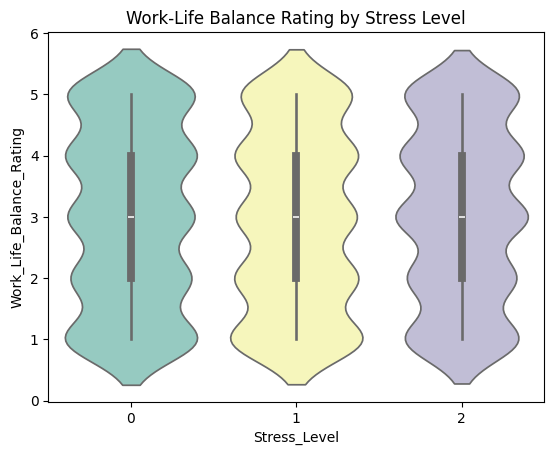

In [31]:
# Violin Plot 
sns.violinplot(x='Stress_Level', y='Work_Life_Balance_Rating', data=data, palette='Set3')
plt.title('Work-Life Balance Rating by Stress Level')
plt.show()



This graph shows the relation between the stress levels "Stress_Level" and "Work_Life_Balance_Rating".

X: Stress levels (0, 1 and 2 - low, medium, and high)
Y: Classification between professional life and personal life (on a scale from 0 to 6, beeing the 6 the best one)

Observations:
Each "violin represents the distribution of the classifications of work life balance for each stress level.
The medians seem to be pretty similiar
The stress 0 (low) seems to have the most variability, while the stress 1 has the lowest

Our conclusions are that the distributions suggest that the stress level can influence the way people understand their balance between the work and personal life thus people with low stress show that they have a better balance, while those with high stress show to have a worser work life balance!

C:\Users\migue\AppData\Local\Temp\ipykernel_16260\1111723893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Work_Location', y='Hours_Worked_Per_Week', data=data, palette='cubehelix')


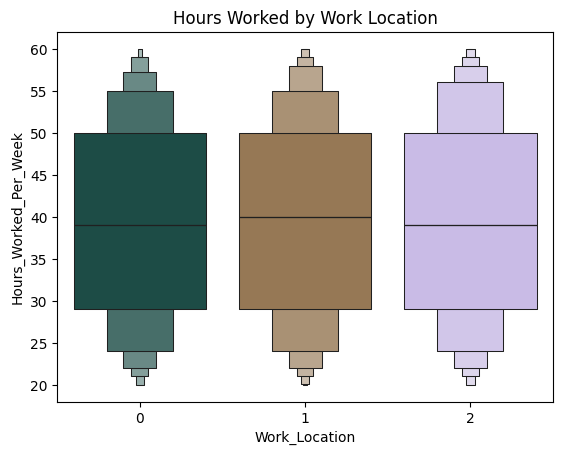

In [30]:
# Boxen Plot
sns.boxenplot(x='Work_Location', y='Hours_Worked_Per_Week', data=data, palette='cubehelix')
plt.title('Hours Worked by Work Location')
plt.show()

Boxen plots are excellent for visualizing the nuances of data distribution. In this case, they reveal that while the work location may not drastically change the median hours worked, it might influence the overall spread and shape of the distribution.
Our conclusions are that there is no strong effect of location on Median Hours because the similar medians suggest that the work location might not strongly influence the typical number of hours worked. The variability within locations shows that the different shapes shows variability in hours word within each location. Some people work more than others, regarding their location while working.
The job roles, stress levels or individual preferences might explain better the variations between each work location.


### Categorical Variable Relationships

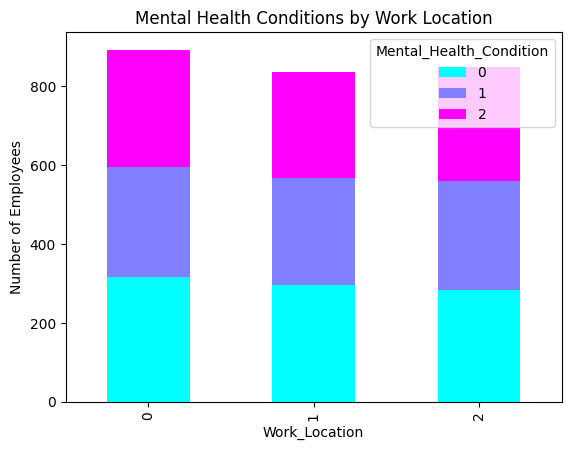

In [32]:
# Group data for visualization
stacked_data = pd.crosstab(data['Work_Location'], data['Mental_Health_Condition'])

# Stacked bar plot
stacked_data.plot(kind='bar', stacked=True, colormap='cool')
plt.title('Mental Health Conditions by Work Location')
plt.ylabel('Number of Employees')
plt.show()

### Swarm Plots

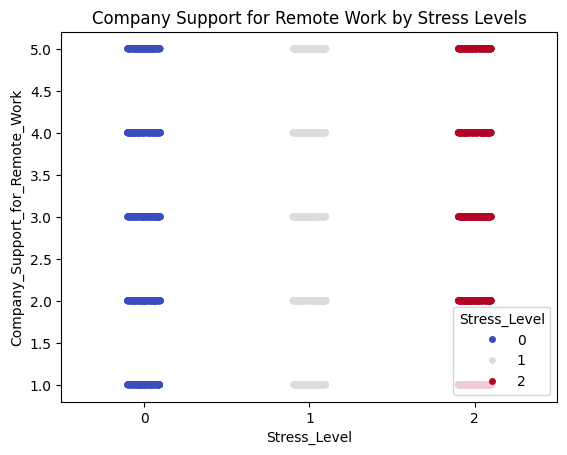

C:\Users\migue\AppData\Local\Temp\ipykernel_16260\3395210332.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stress_Level', y='Company_Support_for_Remote_Work', data=agg_data, palette='coolwarm')


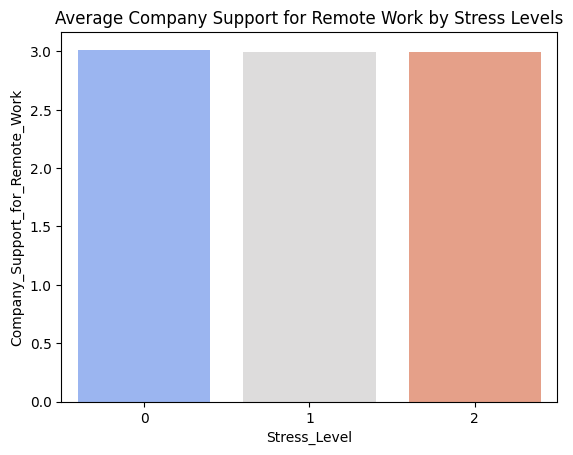

In [38]:
# Swarm Plot for Stress Levels
sns.stripplot(x='Stress_Level', y='Company_Support_for_Remote_Work', hue='Stress_Level', data=data, palette='coolwarm', jitter=True)
plt.title('Company Support for Remote Work by Stress Levels')
plt.show()


agg_data = data.groupby('Stress_Level')['Company_Support_for_Remote_Work'].mean().reset_index()

# Plot
sns.barplot(x='Stress_Level', y='Company_Support_for_Remote_Work', data=agg_data, palette='coolwarm')
plt.title('Average Company Support for Remote Work by Stress Levels')
plt.show()

## Question 2: How does work-life balance relate to employee satisfaction with remote 

We need to verify if there are invalid values in the columns relevant to the analysis. (Work_Life_Balance_Rating) and (Satisfactions_with_Remote_Work)

In [40]:
data = data.dropna(subset=['Work_Life_Balance_Rating', 'Satisfaction_with_Remote_Work'])

data['Work_Life_Balance_Rating'] = pd.to_numeric(data['Work_Life_Balance_Rating'], errors='coerce')
data['Satisfaction_with_Remote_Work'] = data['Satisfaction_with_Remote_Work'].astype('category')

Exploratory Data Analysis (EDA)

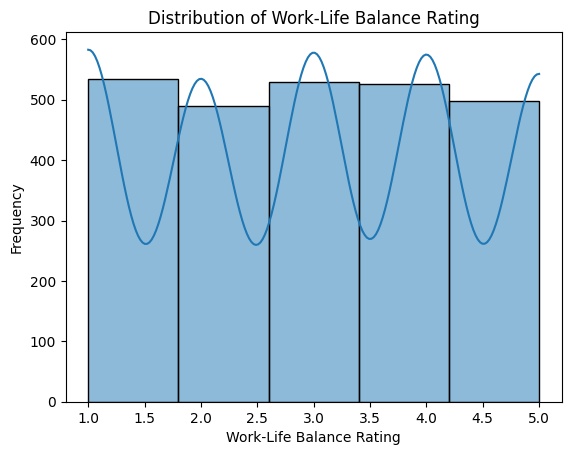

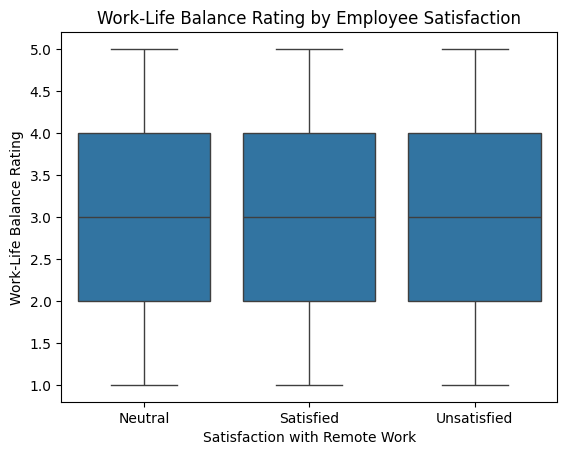

In [42]:
# Distribution of Work_Life_Balance_Rating
sns.histplot(data['Work_Life_Balance_Rating'], kde=True, bins=5)
plt.title('Distribution of Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Work_Life_Balance_Rating by Satisfaction_with_Remote_Work
sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=data)
plt.title('Work-Life Balance Rating by Employee Satisfaction')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Work-Life Balance Rating')
plt.show()

Univariate Analysis

Bivariate Analysis

Statistical Analysis

Multivariate Analysis

Conclusion and insights

Work-Life Balance by Work Location:

Employees working remotely report higher work-life balance ratings compared to those working onsite or in hybrid settings. Onsite workers generally experience the lowest work-life balance ratings, likely due to stricter schedules and commuting.

Work-Life Balance and Satisfaction with Remote Work:

Higher work-life balance ratings strongly correlate with being Satisfied with remote work.
Employees who are Neutral or Unsatisfied with remote work tend to have lower work-life balance ratings.

Correlation Analysis:

Work-Life Balance Rating positively correlates with:
Company Support for Remote Work (0.54): Better company support improves work-life balance.
Sleep Quality (correlation to explore next): Likely indicates how balance impacts personal well-being.
No significant correlation between work-life balance and Hours Worked Per Week or Number of Virtual Meetings, suggesting other factors influence work-life balance.

## Question 3: Are there differences in the impact of remote work on mental health across different industries or roles? 

## Question 4: Does access to mental health resources affect productivity and sleep quality?


## Question 5: Are there regional patterns that show variations in stress and social isolation levels among remote employees?

### Testing Chat-GPT with some prompts


Dataset Shape: (5000, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition     

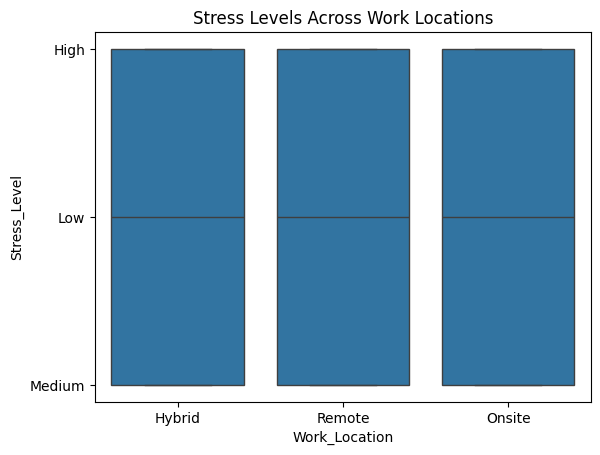

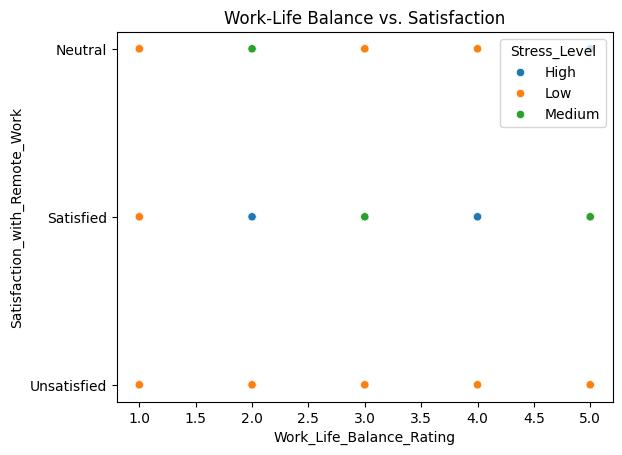

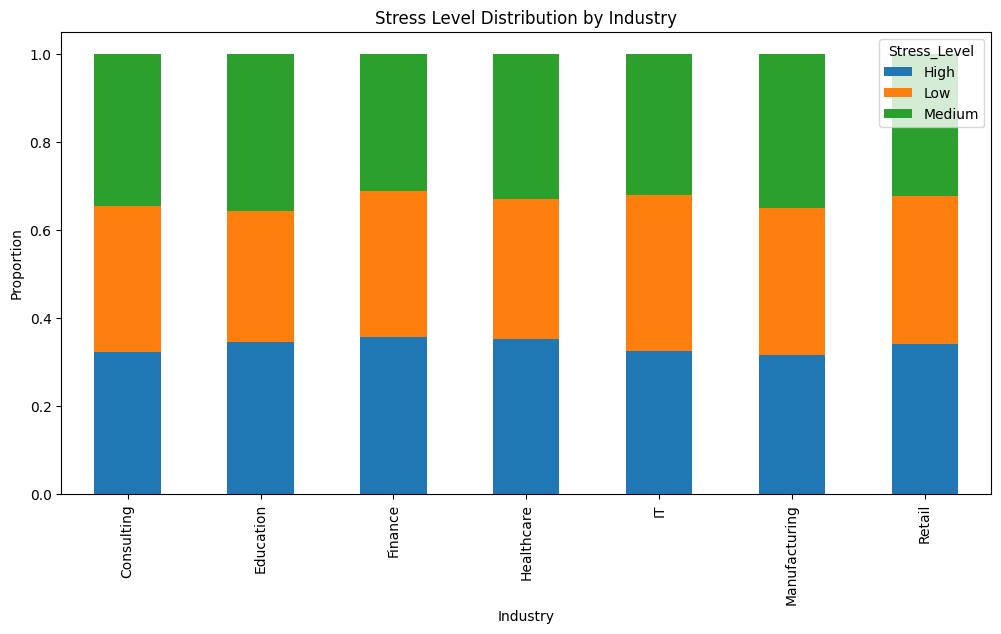


Chi-Square Test for Access to Resources and Productivity:
Chi2: 6.272911668512943 
P-value: 0.04343647147301801


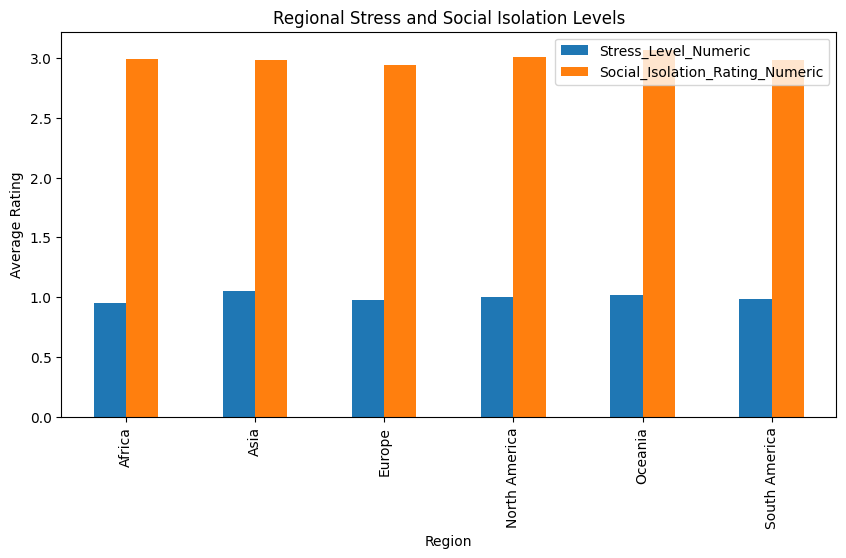

Analysis completed and cleaned dataset saved.


In [14]:
# Mental Health and Remote Work Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

# Load the dataset
data_path = 'dataset.csv'  # Replace with your dataset path
df = pd.read_csv(data_path)

# Data Overview
def data_overview(df):
    """Displays basic information about the dataset."""
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    print(df.info())
    print("\nSample Data:")
    print(df.head())

# Initial overview
data_overview(df)

# Data Cleaning
# Dropping irrelevant columns (e.g., Employee_ID)
df.drop(columns=['Employee_ID'], inplace=True)

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling categorical columns
categorical_columns = ['Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                       'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Handling duplicates
df.drop_duplicates(inplace=True)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Exploratory Analysis
# Question 1: Correlation with Stress Levels and Mental Health Conditions
print("\nCorrelation Analysis:")
correlation_cols = ['Hours_Worked_Per_Week', 'Company_Support_for_Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating']
correlations = {}
for col in correlation_cols:
    if col in df.columns:
        corr, _ = pearsonr(df[col], df['Stress_Level'].cat.codes)
        correlations[col] = corr
print("Stress Level Correlations:", correlations)

# Visualization: Stress Levels vs. Work Location
sns.boxplot(x='Work_Location', y='Stress_Level', data=df)
plt.title("Stress Levels Across Work Locations")
plt.show()

# Question 2: Work-life balance and Employee Satisfaction
sns.scatterplot(x='Work_Life_Balance_Rating', y='Satisfaction_with_Remote_Work', hue='Stress_Level', data=df)
plt.title("Work-Life Balance vs. Satisfaction")
plt.show()

# Question 3: Industry and Role Differences
industry_stress = df.groupby('Industry')['Stress_Level'].value_counts(normalize=True).unstack()
industry_stress.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stress Level Distribution by Industry")
plt.ylabel("Proportion")
plt.show()

# Question 4: Mental Health Resources and Productivity
resources_productivity = pd.crosstab(df['Access_to_Mental_Health_Resources'], df['Productivity_Change'])
chi2, p, dof, ex = chi2_contingency(resources_productivity)
print("\nChi-Square Test for Access to Resources and Productivity:\nChi2:", chi2, "\nP-value:", p)

# Question 5: Regional Stress and Isolation
# Convert 'Stress_Level' and 'Social_Isolation_Rating' to numeric for aggregation
df['Stress_Level_Numeric'] = df['Stress_Level'].cat.codes
df['Social_Isolation_Rating_Numeric'] = pd.to_numeric(df['Social_Isolation_Rating'], errors='coerce')

region_analysis = df.groupby('Region')[['Stress_Level_Numeric', 'Social_Isolation_Rating_Numeric']].mean()
region_analysis.plot(kind='bar', figsize=(10, 5))
plt.title("Regional Stress and Social Isolation Levels")
plt.ylabel("Average Rating")
plt.show()

# Save cleaned data
# DEVEMOS FAZER ISTO?
df.to_csv('cleaned_dataset.csv', index=False)

print("Analysis completed and cleaned dataset saved.")
